## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Read Dataset

In [ ]:
dataset = pd.read_csv('data jkse 1000.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,6077.740234,6084.165039,5988.872070,6000.582031,6000.582031,127549800
1,2019-10-08,6021.692871,6046.458008,6009.381836,6039.601074,6039.601074,124640500
2,2019-10-09,6030.458984,6047.792969,6017.359863,6029.160156,6029.160156,111759600
3,2019-10-10,6023.976074,6044.113770,6018.445801,6023.641113,6023.641113,89240100
4,2019-10-11,6033.321777,6109.118164,6033.321777,6105.799805,6105.799805,105411100
...,...,...,...,...,...,...,...
995,2023-11-06,6788.850098,6878.835938,6787.228027,6878.835938,6878.835938,228787500
996,2023-11-07,6878.835938,6887.022949,6806.881836,6843.790039,6843.790039,193087900
997,2023-11-08,6843.653809,6843.917969,6760.102051,6804.105957,6804.105957,151412300
998,2023-11-09,6804.105957,6865.077148,6793.764160,6838.232910,6838.232910,120495400


In [ ]:
dataset["Date"] = pd.to_datetime(dataset["Date"],format='%Y-%m-%d')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,6077.740234,6084.165039,5988.872070,6000.582031,6000.582031,127549800
1,2019-10-08,6021.692871,6046.458008,6009.381836,6039.601074,6039.601074,124640500
2,2019-10-09,6030.458984,6047.792969,6017.359863,6029.160156,6029.160156,111759600
3,2019-10-10,6023.976074,6044.113770,6018.445801,6023.641113,6023.641113,89240100
4,2019-10-11,6033.321777,6109.118164,6033.321777,6105.799805,6105.799805,105411100
...,...,...,...,...,...,...,...
995,2023-11-06,6788.850098,6878.835938,6787.228027,6878.835938,6878.835938,228787500
996,2023-11-07,6878.835938,6887.022949,6806.881836,6843.790039,6843.790039,193087900
997,2023-11-08,6843.653809,6843.917969,6760.102051,6804.105957,6804.105957,151412300
998,2023-11-09,6804.105957,6865.077148,6793.764160,6838.232910,6838.232910,120495400


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1000 non-null   datetime64[ns]
 1   Open       1000 non-null   float64       
 2   High       1000 non-null   float64       
 3   Low        1000 non-null   float64       
 4   Close      1000 non-null   float64       
 5   Adj Close  1000 non-null   float64       
 6   Volume     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.8 KB
None


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6292.408902,6327.336160,6251.982664,6290.040471,6290.040471,1.552395e+08
std,729.244103,725.429057,733.621645,729.198962,729.198962,7.002050e+07
min,3937.632080,4123.562012,3911.716064,3937.632080,3937.632080,0.000000e+00
25%,6010.324096,6040.100586,5963.942139,6004.899170,6004.899170,1.139306e+08
50%,6552.809570,6587.660889,6516.904053,6547.114013,6547.114013,1.594480e+08
75%,6864.346192,6901.825928,6828.034301,6864.251953,6864.251953,1.960696e+08
max,7317.895996,7377.495117,7278.198242,7318.016113,7318.016113,6.150719e+08


Text(0.5, 1.0, 'Daily Data Close Price JKSE')

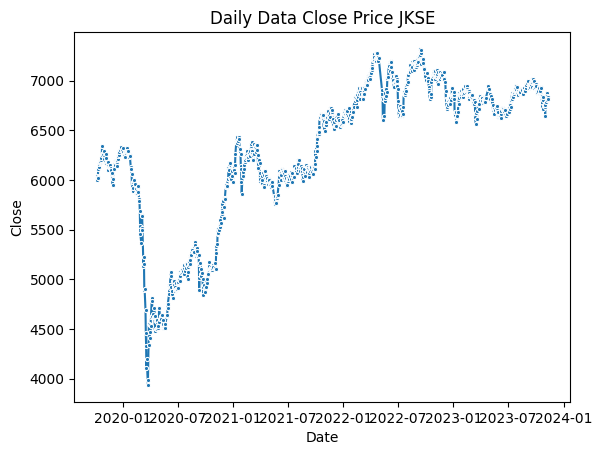

In [ ]:
sns.lineplot(x="Date", y="Close",
             data=dataset, marker='.')
plt.title("Daily Data Close Price JKSE")

In [ ]:
import plotly.express as px

df = dataset.set_index('Date').rename_axis('features', axis=1)
fig = px.area(df, facet_col='features', facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()

## Plot PACF

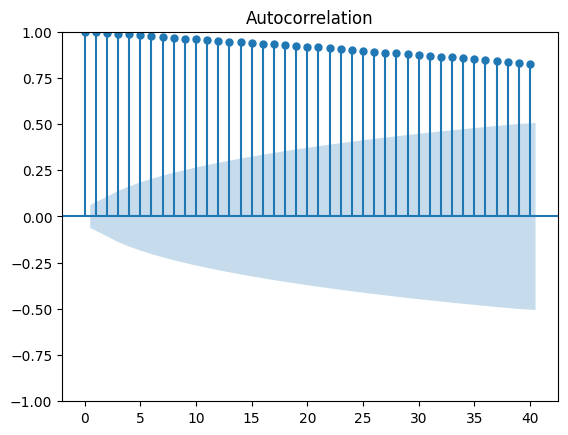

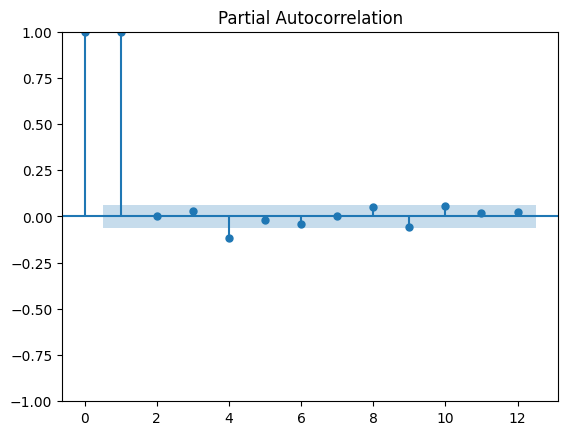

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

acf_plot = plot_acf(dataset.Close, lags=40) #dies down
pacf_plot = plot_pacf(dataset.Close, lags=12)

## Split data to valing and testing

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,6077.740234,6084.165039,5988.872070,6000.582031,6000.582031,127549800
1,2019-10-08,6021.692871,6046.458008,6009.381836,6039.601074,6039.601074,124640500
2,2019-10-09,6030.458984,6047.792969,6017.359863,6029.160156,6029.160156,111759600
3,2019-10-10,6023.976074,6044.113770,6018.445801,6023.641113,6023.641113,89240100
4,2019-10-11,6033.321777,6109.118164,6033.321777,6105.799805,6105.799805,105411100


In [ ]:
n_lookback = 4  # length of input sequences (lookback period)
n_forecast = 4  # length of output sequences (forecast period)

In [ ]:
data_train = dataset[:-n_forecast]['Close']
data_train = pd.DataFrame(data_train)
data_train.index = dataset[:-n_forecast].index

data_test = dataset[-n_forecast:]['Close']
data_test = pd.DataFrame(data_test)
data_test.index = dataset[-n_forecast:].index

print('shape of training data: ',data_train.shape);print('shape of testing data: ',data_test.shape)

shape of training data:  (996, 1)
shape of testing data:  (4, 1)


In [ ]:
data_test.head()

,Close
996,6843.790039
997,6804.105957
998,6838.232910
999,6809.263184


In [ ]:
Close = data_train["Close"]
Close = Close.values.reshape(-1, 1)

In [ ]:
# Splits the data into training and validation sets.
SPLIT_TIME = int(len(data_train) * 0.7)
Close_train = Close[:SPLIT_TIME]
Close_val = Close[SPLIT_TIME:]
print(Close_train.shape);print(Close_val.shape)

(697, 1)
(299, 1)


In [ ]:
x_train = []
y_train = []

for i in range(n_lookback, len(Close_train) - n_forecast + 1):
    x_train.append(Close_train[i - n_lookback: i])
    y_train.append(Close_train[i: i + n_forecast])

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(690, 4, 1)
(690, 4, 1)


In [ ]:
print(x_train[0]);print(y_train[0])

[[6000.582031]
 [6039.601074]
 [6029.160156]
 [6023.641113]]
[[6105.799805]
 [6126.876953]
 [6158.166016]
 [6169.591797]]


In [ ]:
x_val = []
y_val = []

for i in range(n_lookback, len(Close_val) - n_forecast + 1):
    x_val.append(Close_val[i - n_lookback: i])
    y_val.append(Close_val[i: i + n_forecast])

x_val = np.array(x_val)
y_val = np.array(y_val)
print(x_val.shape)
print(y_val.shape)

(292, 4, 1)
(292, 4, 1)


In [ ]:
print(x_val[-1]);print(y_val[-1])

[[6714.519043]
 [6758.792969]
 [6735.89209 ]
 [6752.210938]]
[[6642.417969]
 [6751.38623 ]
 [6788.850098]
 [6878.835938]]


# Vanilla LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dense

modelVanillaLSTM = Sequential([
        LSTM(16, activation='relu', input_shape=x_train[0].shape, return_sequences=True),
        Flatten(),
        Dense(n_forecast)
    ])

modelVanillaLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 16)             1152      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 1412 (5.52 KB)
Trainable params: 1412 (5.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
modelVanillaLSTM.compile(loss=tf.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5, patience=5,
                                          verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=1,
                                       restore_best_weights=True)
# mc=tf.keras.callbacks.ModelCheckpoint('./model/UnivariateForecast_VanillaLSTM-Model.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [ ]:
historyVanillaLSTM = modelVanillaLSTM.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=64,
    callbacks=[rlronp, estop],
    validation_data=(x_val,y_val))

Epoch 1/1000
11/11 [==============================] - 2s 57ms/step - loss: 5712.7373 - mae: 5713.2373 - val_loss: 6512.4253 - val_mae: 6512.9253 - lr: 1.0000e-04
Epoch 2/1000
11/11 [==============================] - 0s 12ms/step - loss: 5691.1943 - mae: 5691.6943 - val_loss: 6485.6206 - val_mae: 6486.1206 - lr: 1.0000e-04
Epoch 3/1000
11/11 [==============================] - 0s 11ms/step - loss: 5610.7314 - mae: 5611.2314 - val_loss: 6314.4009 - val_mae: 6314.9009 - lr: 1.0000e-04
Epoch 4/1000
11/11 [==============================] - 0s 11ms/step - loss: 5517.1938 - mae: 5517.6938 - val_loss: 6277.7427 - val_mae: 6278.2427 - lr: 1.0000e-04
Epoch 5/1000
11/11 [==============================] - 0s 12ms/step - loss: 5484.6172 - mae: 5485.1172 - val_loss: 6242.8301 - val_mae: 6243.3301 - lr: 1.0000e-04
Epoch 6/1000
11/11 [==============================] - 0s 13ms/step - loss: 5454.1812 - mae: 5454.6812 - val_loss: 6208.4507 - val_mae: 6208.9507 - lr: 1.0000e-04
Epoch 7/1000
11/11 [========

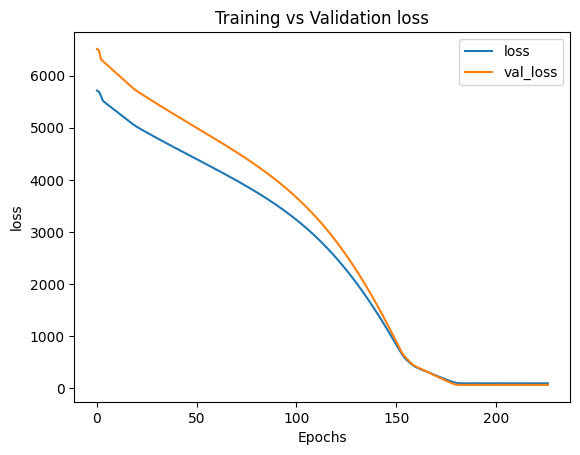

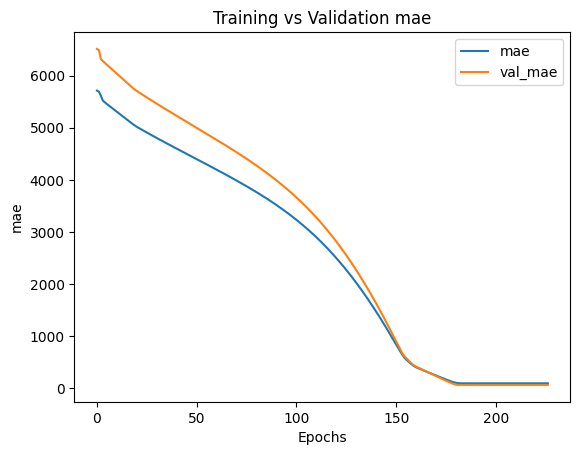

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f"Training vs Validation {metric}")
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(historyVanillaLSTM, "loss")
plot_graphs(historyVanillaLSTM, "mae")

## Prediction with validation data

In [ ]:
def model_forecast(model, series, window_size, batch_size):
   ds = tf.data.Dataset.from_tensor_slices(series)
   ds = ds.window(window_size, shift=1, drop_remainder=True)
   ds = ds.flat_map(lambda w: w.batch(window_size))
   ds = ds.batch(batch_size, drop_remainder=True).prefetch(1)
   forecast = model.predict(ds)
   return forecast

In [ ]:
rnn_forecast = model_forecast(modelVanillaLSTM, Close_val, n_lookback, 1)
print(rnn_forecast.shape)

rnn_forecast = rnn_forecast[:-1, 0]
print(rnn_forecast.shape)
print(Close_val.shape[0]-n_lookback)

296/296 [==============================] - 1s 2ms/step
(296, 4)
(295,)
295


In [ ]:
# # rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast = rnn_forecast.reshape(-1, 1)
rnn_forecast[:5]

array([[7181.42  ],
       [7169.5938],
       [7157.668 ],
       [7185.5747],
       [7187.92  ]], dtype=float32)

In [ ]:
actual = np.squeeze(Close_val[-rnn_forecast.shape[0]-2:-2])
print(actual.shape)

(295,)


In [ ]:
# actual = scaler.inverse_transform(actual.reshape(-1, 1))
actual[:5]

array([7107.98291 , 7163.265137, 7194.706055, 7174.208008, 7135.248047])

In [ ]:
df_ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_['Date'] = data_train[-rnn_forecast.shape[0]:].index
df_['Forecast'] = rnn_forecast
df_['Actual'] = actual
df_

,Date,Actual,Forecast
0,701,7107.982910,7181.419922
1,702,7163.265137,7169.593750
2,703,7194.706055,7157.667969
3,704,7174.208008,7185.574707
4,705,7135.248047,7187.919922
...,...,...,...
290,991,6758.792969,6794.314453
291,992,6735.892090,6746.703613
292,993,6752.210938,6755.252441
293,994,6642.417969,6738.716797


<Axes: xlabel='Date', ylabel='Actual'>

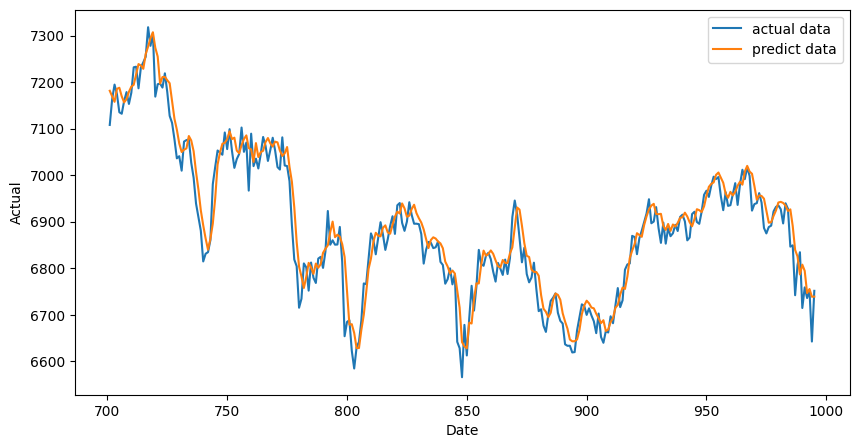

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data")
sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])
mape = mean_absolute_percentage_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,5))
print('MAE: ', round(mae,5))
print('MAPE:', round(mape,5))

Forecast accuracy
RMSE:  39.12537
MAE:  29.99836
MAPE: 0.00435


## Prediction with  4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = modelVanillaLSTM.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)


1/1 [==============================] - 0s 159ms/step


In [ ]:
print(np.shape(X_)); print(np.shape(Y_))

(1, 4, 1)
(4, 1)


In [ ]:
actual = np.array(data_test['Close'])
forecast = np.squeeze(Y_)

In [ ]:
print(np.shape(actual)); print(np.shape(forecast))

(4,)
(4,)


In [ ]:
data_test.head()

,Close
996,6843.790039
997,6804.105957
998,6838.232910
999,6809.263184


In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = data_test[-n_forecast:].index
df_future['Forecast'] = forecast
df_future['Actual'] = actual
df_future

,Date,Actual,Forecast
0,996,6843.790039,6730.249512
1,997,6804.105957,6732.350586
2,998,6838.232910,6717.500977
3,999,6809.263184,6745.534180


<Axes: xlabel='Date', ylabel='Actual'>

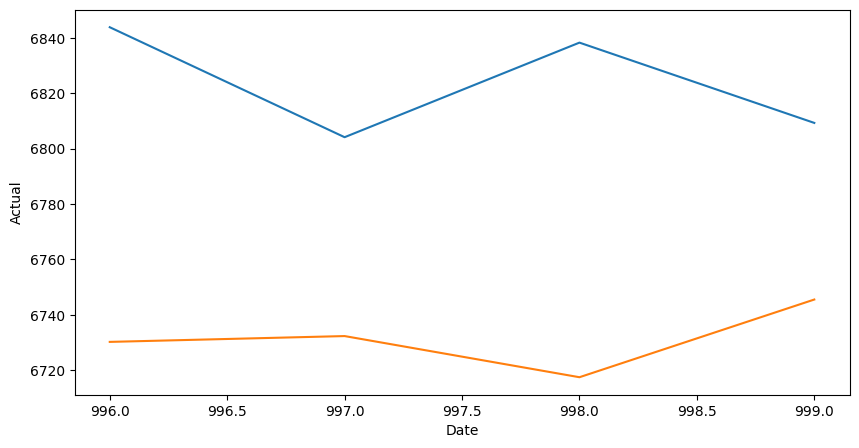

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_future)
sns.lineplot(x="Date", y="Forecast",
             data=df_future)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])
mape = mean_absolute_percentage_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))
print('MAPE:', round(mape,2))

Forecast accuracy
RMSE:  39.13
MAE:  30.0
MAPE: 0.0


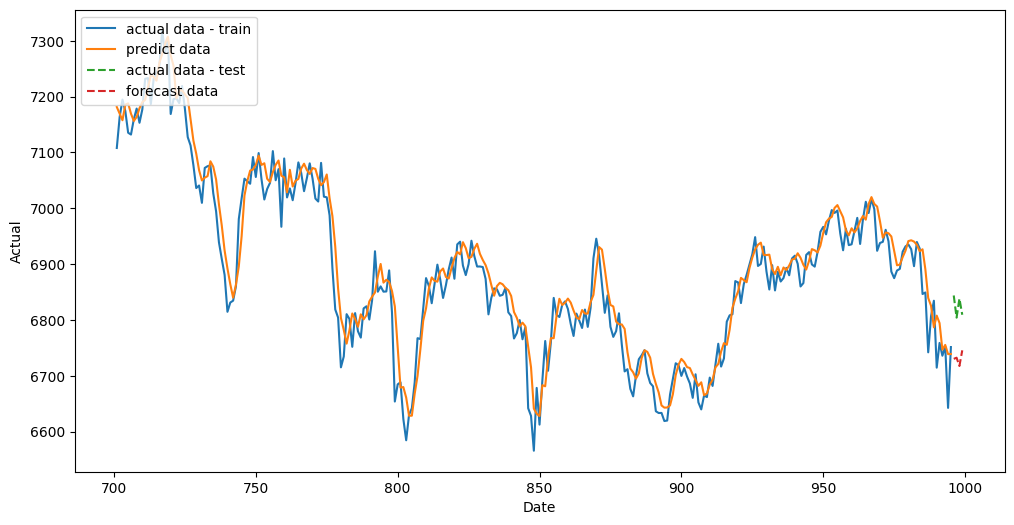

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df_future,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_future,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

## Prediction with 3 x 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback*3:]  # last available input sequence

rnn_forecast2 = model_forecast(modelVanillaLSTM, X_, n_lookback, 1)
print(rnn_forecast2.shape)

rnn_forecast2 = rnn_forecast2[:-1, 0]
print(rnn_forecast2.shape)
print(Close_val[- n_lookback*2:].shape[0]-n_lookback)

9/9 [==============================] - 0s 3ms/step
(9, 4)
(8,)
4


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast2 = rnn_forecast2[-n_forecast:]
rnn_forecast2.shape

(4,)

In [ ]:
actual = np.array(data_test['Close'])

print(np.shape(actual)); print(np.shape(rnn_forecast2))


(4,)
(4,)


In [ ]:
df__ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df__['Date'] = data_test[-rnn_forecast2.shape[0]:].index
df__['Forecast'] = rnn_forecast2
df__['Actual'] = actual
df__

,Date,Actual,Forecast
0,996,6843.790039,6746.703613
1,997,6804.105957,6755.252441
2,998,6838.232910,6738.716797
3,999,6809.263184,6738.979980


<Axes: xlabel='Date', ylabel='Actual'>

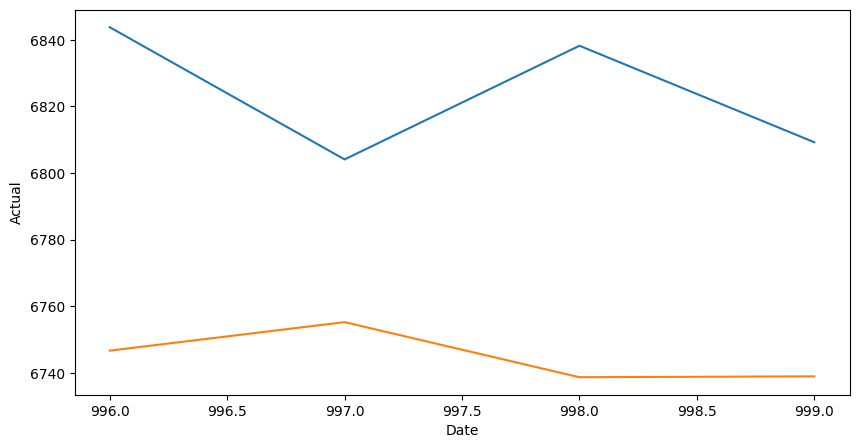

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df__)
sns.lineplot(x="Date", y="Forecast",
             data=df__)

In [ ]:
rmse = mean_squared_error(df__['Forecast'], df__['Actual'], squared=False)
mae = mean_absolute_error(df__['Forecast'], df__['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  81.63
MAE:  78.93


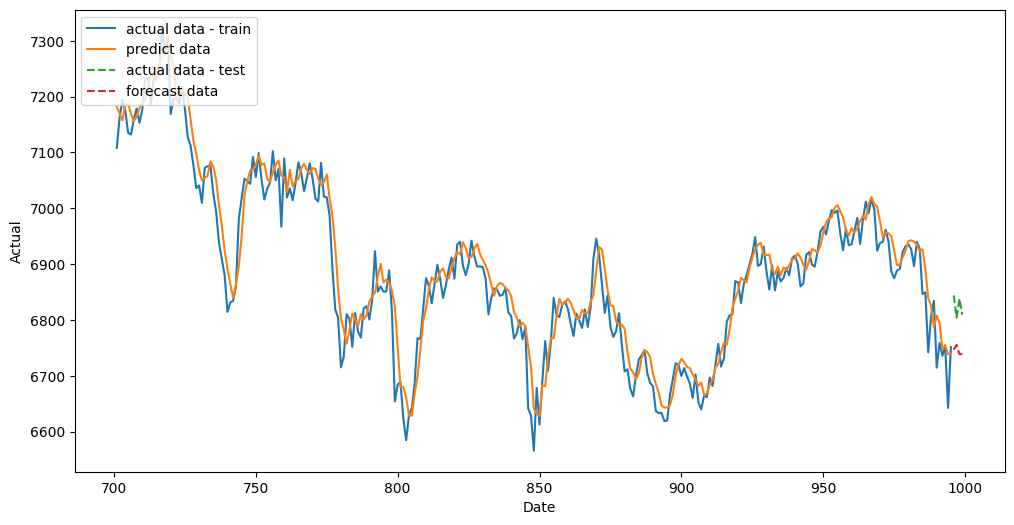

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df__,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df__,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

# Stacked LSTM

### Create Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dense

modelStackedLSTM = Sequential([
        LSTM(32, activation='relu', input_shape=x_train[0].shape, return_sequences=True),
        LSTM(32, activation='relu', return_sequences=True),
        Flatten(),
        Dense(n_forecast)
    ])

modelStackedLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4, 32)             4352      
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             8320      
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 13188 (51.52 KB)
Trainable params: 13188 (51.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
modelStackedLSTM.compile(loss=tf.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5, patience=5,
                                          verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=1,
                                       restore_best_weights=True)
# mc=tf.keras.callbacks.ModelCheckpoint('./model/UnivariateForecast_StackedLSTM-Model.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [ ]:
historyStackedLSTM = modelStackedLSTM.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=64,
    callbacks=[rlronp, estop],
    validation_data=(x_val,y_val))

Epoch 1/1000
11/11 [==============================] - 4s 67ms/step - loss: 6043.6313 - mae: 6044.1313 - val_loss: 6894.2520 - val_mae: 6894.7520 - lr: 1.0000e-04
Epoch 2/1000
11/11 [==============================] - 0s 10ms/step - loss: 6030.9463 - mae: 6031.4463 - val_loss: 6879.4517 - val_mae: 6879.9517 - lr: 1.0000e-04
Epoch 3/1000
11/11 [==============================] - 0s 11ms/step - loss: 6017.3213 - mae: 6017.8213 - val_loss: 6861.7412 - val_mae: 6862.2412 - lr: 1.0000e-04
Epoch 4/1000
11/11 [==============================] - 0s 11ms/step - loss: 6001.3579 - mae: 6001.8579 - val_loss: 6845.4805 - val_mae: 6845.9805 - lr: 1.0000e-04
Epoch 5/1000
11/11 [==============================] - 0s 11ms/step - loss: 5988.5229 - mae: 5989.0229 - val_loss: 6831.3218 - val_mae: 6831.8218 - lr: 1.0000e-04
Epoch 6/1000
11/11 [==============================] - 0s 12ms/step - loss: 5976.2036 - mae: 5976.7036 - val_loss: 6817.2622 - val_mae: 6817.7622 - lr: 1.0000e-04
Epoch 7/1000
11/11 [========

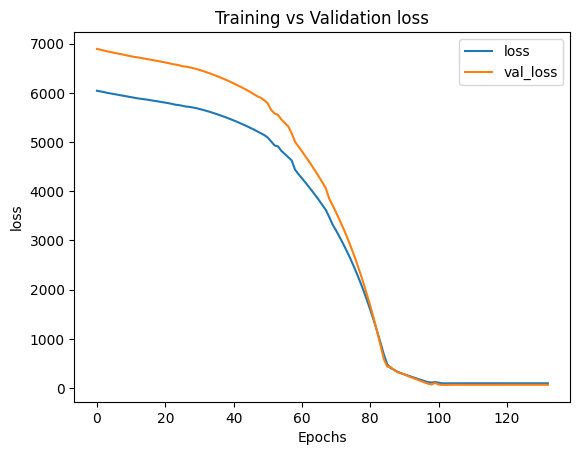

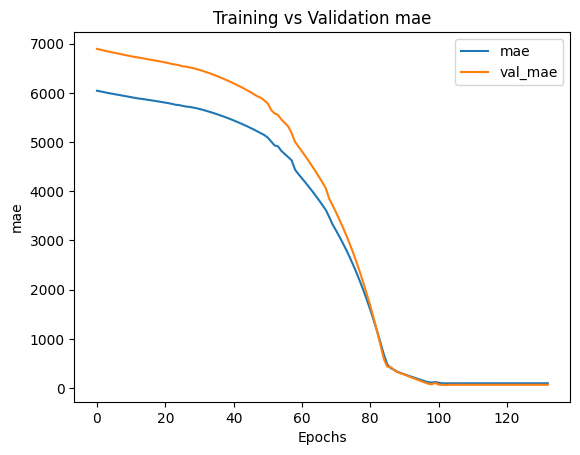

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f"Training vs Validation {metric}")
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(historyStackedLSTM, "loss")
plot_graphs(historyStackedLSTM, "mae")

## Prediction with validation data

In [ ]:
def model_forecast(model, series, window_size, batch_size):
   ds = tf.data.Dataset.from_tensor_slices(series)
   ds = ds.window(window_size, shift=1, drop_remainder=True)
   ds = ds.flat_map(lambda w: w.batch(window_size))
   ds = ds.batch(batch_size, drop_remainder=True).prefetch(1)
   forecast = model.predict(ds)
   return forecast

In [ ]:
rnn_forecast = model_forecast(modelStackedLSTM, Close_val, n_lookback, 1)
print(rnn_forecast.shape)

rnn_forecast = rnn_forecast[:-1, 0]
print(rnn_forecast.shape)
print(Close_val.shape[0]-n_lookback)

296/296 [==============================] - 1s 2ms/step
(296, 4)
(295,)
295


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast[:5]

array([7175.356, 7156.392, 7140.53 , 7177.255, 7183.544], dtype=float32)

In [ ]:
actual = np.squeeze(Close_val[-rnn_forecast.shape[0]-2:-2])
print(actual.shape)

(295,)


In [ ]:
# actual = scaler.inverse_transform(actual.reshape(-1, 1))
actual[:5]

array([7107.98291 , 7163.265137, 7194.706055, 7174.208008, 7135.248047])

In [ ]:
df_ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_['Date'] = data_train[-rnn_forecast.shape[0]:].index
df_['Forecast'] = rnn_forecast
df_['Actual'] = actual
df_

,Date,Actual,Forecast
0,701,7107.982910,7175.355957
1,702,7163.265137,7156.392090
2,703,7194.706055,7140.529785
3,704,7174.208008,7177.254883
4,705,7135.248047,7183.543945
...,...,...,...
290,991,6758.792969,6791.209961
291,992,6735.892090,6734.572754
292,993,6752.210938,6752.954590
293,994,6642.417969,6732.130371


<Axes: xlabel='Date', ylabel='Actual'>

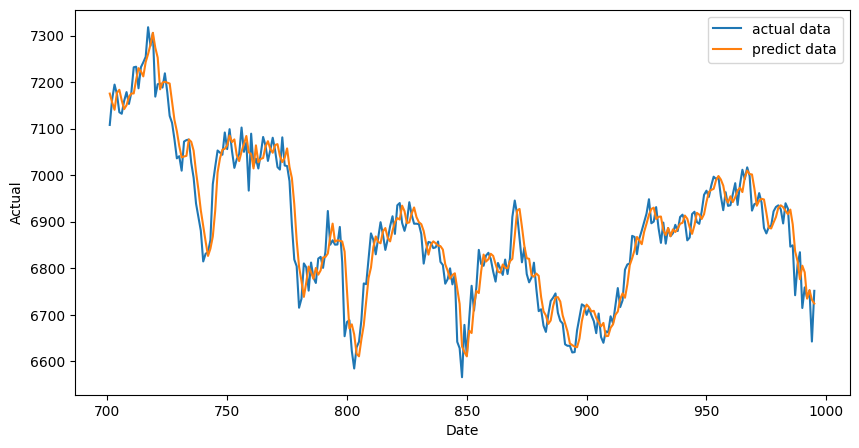

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data")
sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,5))
print('MAE: ', round(mae,5))
print('MAPE: ', round(mape,5))

Forecast accuracy
RMSE:  41.20374
MAE:  31.59132
MAPE:  0.00435


## Prediction with 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = modelStackedLSTM.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)


1/1 [==============================] - 0s 288ms/step


In [ ]:
print(np.shape(X_)); print(np.shape(Y_))

(1, 4, 1)
(4, 1)


In [ ]:
actual = np.array(data_test['Close'])
forecast = np.squeeze(Y_)

In [ ]:
print(np.shape(actual)); print(np.shape(forecast))

(4,)
(4,)


In [ ]:
data_test.head()

,Close
996,6843.790039
997,6804.105957
998,6838.232910
999,6809.263184


In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = data_test[-n_forecast:].index
df_future['Forecast'] = forecast
df_future['Actual'] = actual
df_future

,Date,Actual,Forecast
0,996,6843.790039,6701.237793
1,997,6804.105957,6709.414551
2,998,6838.232910,6712.563477
3,999,6809.263184,6720.847168


<Axes: xlabel='Date', ylabel='Actual'>

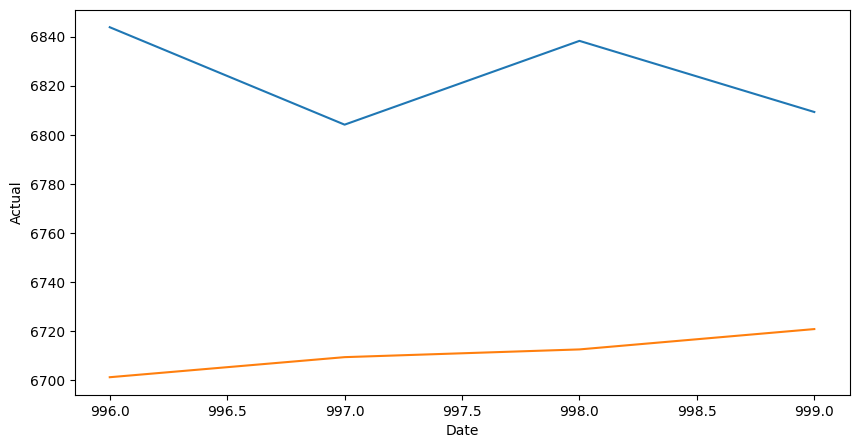

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_future)
sns.lineplot(x="Date", y="Forecast",
             data=df_future)

In [ ]:
rmse = mean_squared_error(df_future['Forecast'], df_future['Actual'], squared=False)
mae = mean_absolute_error(df_future['Forecast'], df_future['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  115.0
MAE:  112.83


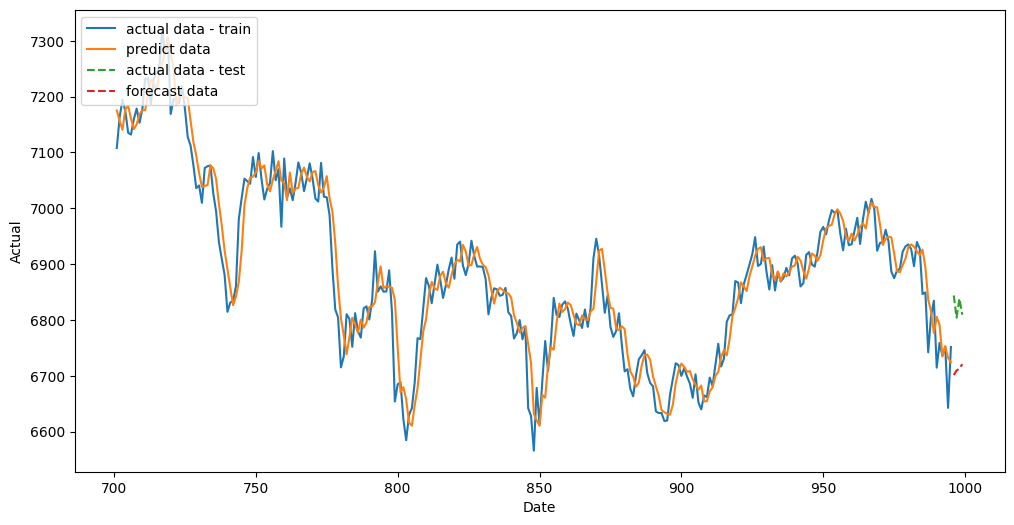

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df_future,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_future,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

## Prediction with 3 x 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback*2:]  # last available input sequence

rnn_forecast2 = model_forecast(modelStackedLSTM, X_, n_lookback, 1)
print(rnn_forecast2.shape)

rnn_forecast2 = rnn_forecast2[:-1, 0]
print(rnn_forecast2.shape)
print(Close_val[- n_lookback*2:].shape[0]-n_lookback)

5/5 [==============================] - 0s 5ms/step
(5, 4)
(4,)
4


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast2 = rnn_forecast2[-n_forecast:]
rnn_forecast2.shape

(4,)

In [ ]:
actual = np.array(data_test['Close'])

print(np.shape(actual)); print(np.shape(rnn_forecast2))


(4,)
(4,)


In [ ]:
df__ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df__['Date'] = data_test[-rnn_forecast2.shape[0]:].index
df__['Forecast'] = rnn_forecast2
df__['Actual'] = actual
df__

,Date,Actual,Forecast
0,996,6843.790039,6734.572754
1,997,6804.105957,6752.954590
2,998,6838.232910,6732.130371
3,999,6809.263184,6724.057129


<Axes: xlabel='Date', ylabel='Actual'>

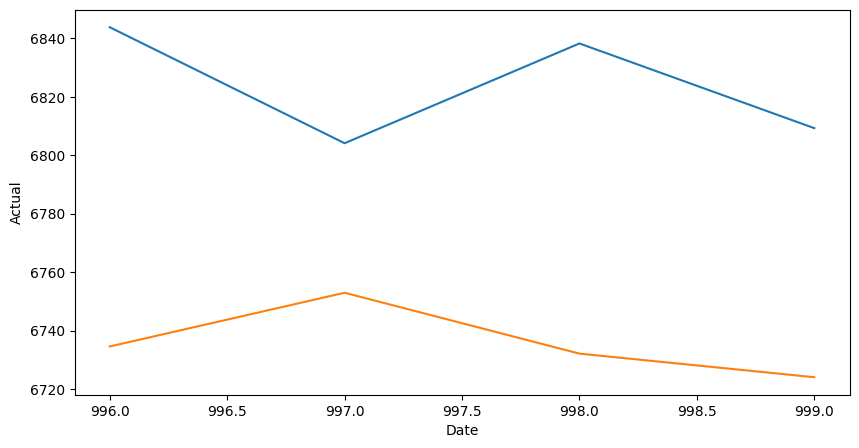

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df__)
sns.lineplot(x="Date", y="Forecast",
             data=df__)

In [ ]:
rmse = mean_squared_error(df__['Forecast'], df__['Actual'], squared=False)
mae = mean_absolute_error(df__['Forecast'], df__['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  90.92
MAE:  87.92


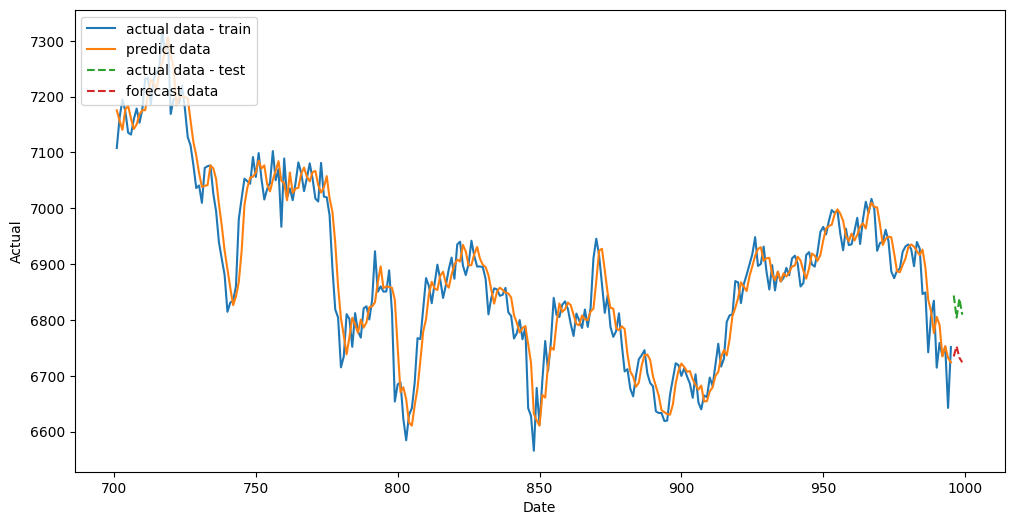

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df__,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df__,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

# Biderectional LSTM

## Create Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import Dense

modelBiLSTM = Sequential([
        Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
                                          input_shape=x_train[0].shape),
        Flatten(),
        Dense(n_forecast)
    ])

modelBiLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 4, 64)             8704      
 al)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 9732 (38.02 KB)
Trainable params: 9732 (38.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
modelBiLSTM.compile(loss=tf.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5, patience=5,
                                          verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=1,
                                       restore_best_weights=True)
# mc=tf.keras.callbacks.ModelCheckpoint('./model/UnivariateForecast_BiLSTM-Model.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [ ]:
historyBiLSTM = modelBiLSTM.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=64,
    callbacks=[rlronp, estop],
    validation_data=(x_val,y_val))

Epoch 1/1000
11/11 [==============================] - 4s 70ms/step - loss: 6694.1812 - mae: 6694.6812 - val_loss: 7608.5942 - val_mae: 7609.0942 - lr: 1.0000e-04
Epoch 2/1000
11/11 [==============================] - 0s 14ms/step - loss: 6612.9712 - mae: 6613.4712 - val_loss: 7490.7114 - val_mae: 7491.2114 - lr: 1.0000e-04
Epoch 3/1000
11/11 [==============================] - 0s 15ms/step - loss: 6530.9146 - mae: 6531.4146 - val_loss: 7420.7944 - val_mae: 7421.2944 - lr: 1.0000e-04
Epoch 4/1000
11/11 [==============================] - 0s 19ms/step - loss: 6469.5898 - mae: 6470.0898 - val_loss: 7351.1284 - val_mae: 7351.6284 - lr: 1.0000e-04
Epoch 5/1000
11/11 [==============================] - 0s 16ms/step - loss: 6408.8208 - mae: 6409.3208 - val_loss: 7281.9023 - val_mae: 7282.4023 - lr: 1.0000e-04
Epoch 6/1000
11/11 [==============================] - 0s 15ms/step - loss: 6348.3472 - mae: 6348.8472 - val_loss: 7212.8545 - val_mae: 7213.3545 - lr: 1.0000e-04
Epoch 7/1000
11/11 [========

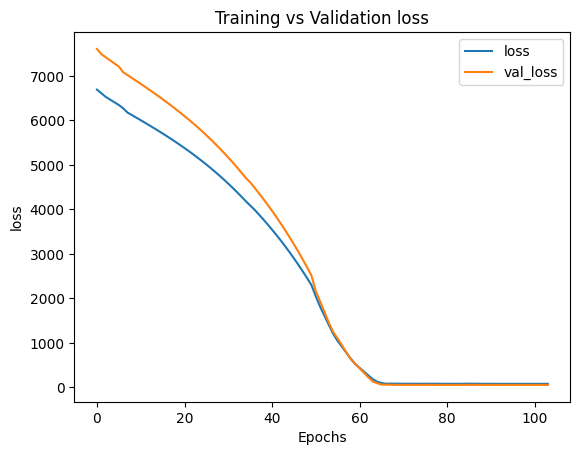

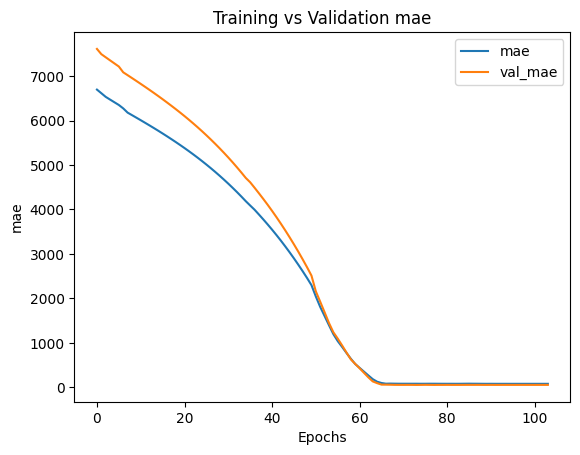

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f"Training vs Validation {metric}")
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(historyBiLSTM, "loss")
plot_graphs(historyBiLSTM, "mae")

## Prediction with validation data

In [ ]:
def model_forecast(model, series, window_size, batch_size):
   ds = tf.data.Dataset.from_tensor_slices(series)
   ds = ds.window(window_size, shift=1, drop_remainder=True)
   ds = ds.flat_map(lambda w: w.batch(window_size))
   ds = ds.batch(batch_size, drop_remainder=True).prefetch(1)
   forecast = model.predict(ds)
   return forecast

In [ ]:
rnn_forecast = model_forecast(modelBiLSTM, Close_val, n_lookback, 1)
print(rnn_forecast.shape)

rnn_forecast = rnn_forecast[:-1, 0]
print(rnn_forecast.shape)
print(Close_val.shape[0]-n_lookback)

296/296 [==============================] - 1s 3ms/step
(296, 4)
(295,)
295


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast[:5]

array([7179.315 , 7187.012 , 7179.5425, 7163.868 , 7160.743 ],
      dtype=float32)

In [ ]:
actual = np.squeeze(Close_val[-rnn_forecast.shape[0]-2:-2])
print(actual.shape)

(295,)


In [ ]:
# actual = scaler.inverse_transform(actual.reshape(-1, 1))
actual[:5]

array([7107.98291 , 7163.265137, 7194.706055, 7174.208008, 7135.248047])

In [ ]:
df_ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_['Date'] = data_train[-rnn_forecast.shape[0]:].index
df_['Forecast'] = rnn_forecast
df_['Actual'] = actual
df_

,Date,Actual,Forecast
0,701,7107.982910,7179.314941
1,702,7163.265137,7187.012207
2,703,7194.706055,7179.542480
3,704,7174.208008,7163.868164
4,705,7135.248047,7160.743164
...,...,...,...
290,991,6758.792969,6764.661621
291,992,6735.892090,6759.898926
292,993,6752.210938,6721.129395
293,994,6642.417969,6748.011230


<Axes: xlabel='Date', ylabel='Actual'>

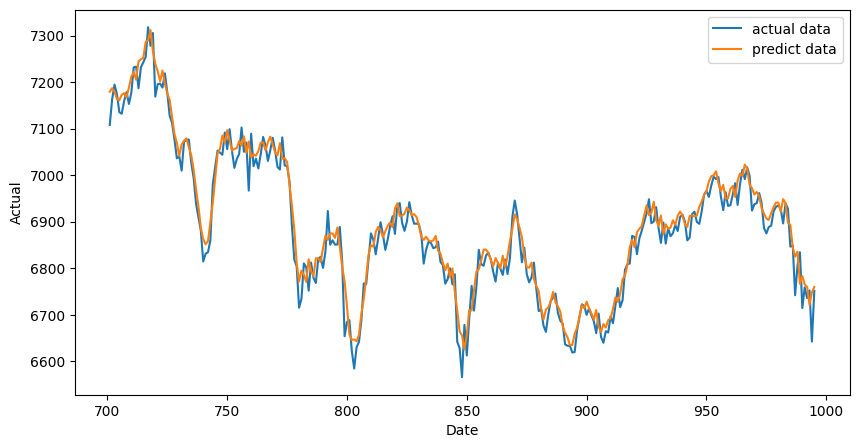

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data")
sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,5))
print('MAE: ', round(mae,5))
print('MAPE: ', round(mape,5))

Forecast accuracy
RMSE:  31.98958
MAE:  25.3835
MAPE:  0.00435


## Prediction with 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = modelBiLSTM.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)


1/1 [==============================] - 0s 292ms/step


In [ ]:
print(np.shape(X_)); print(np.shape(Y_))

(1, 4, 1)
(4, 1)


In [ ]:
actual = np.array(data_test['Close'])
forecast = np.squeeze(Y_)

In [ ]:
print(np.shape(actual)); print(np.shape(forecast))

(4,)
(4,)


In [ ]:
data_test.head()

,Close
996,6843.790039
997,6804.105957
998,6838.232910
999,6809.263184


In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = data_test[-n_forecast:].index
df_future['Forecast'] = forecast
df_future['Actual'] = actual
df_future

,Date,Actual,Forecast
0,996,6843.790039,6780.134277
1,997,6804.105957,6761.060059
2,998,6838.232910,6788.389160
3,999,6809.263184,6763.638184


<Axes: xlabel='Date', ylabel='Actual'>

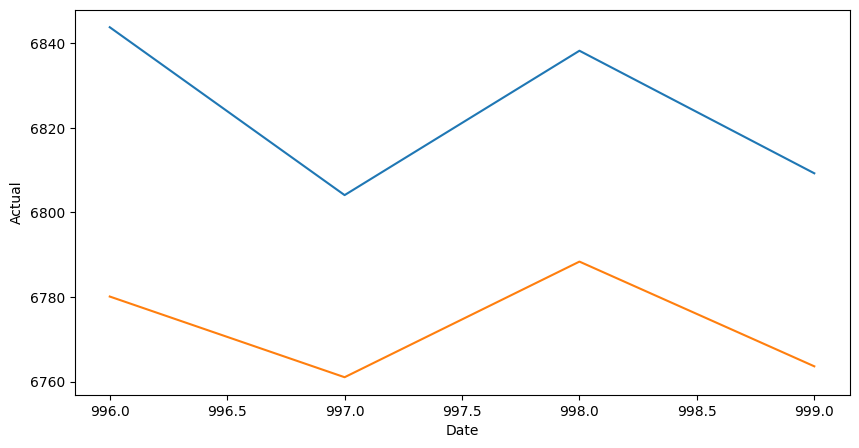

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_future)
sns.lineplot(x="Date", y="Forecast",
             data=df_future)

In [ ]:
rmse = mean_squared_error(df_future['Forecast'], df_future['Actual'], squared=False)
mae = mean_absolute_error(df_future['Forecast'], df_future['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  51.16
MAE:  50.54


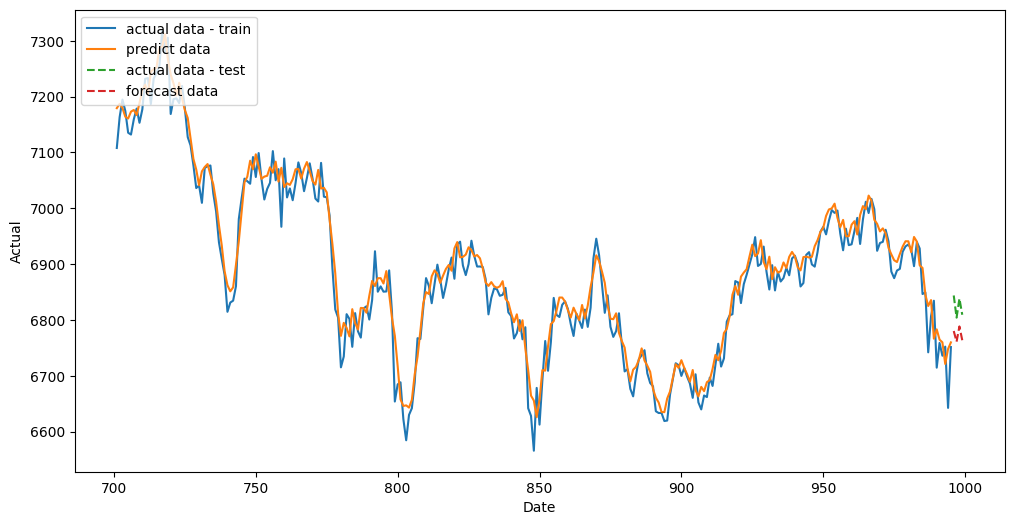

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df_future,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_future,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

## Prediction with 3 x 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback*2:]  # last available input sequence

rnn_forecast2 = model_forecast(modelBiLSTM, X_, n_lookback, 1)
print(rnn_forecast2.shape)

rnn_forecast2 = rnn_forecast2[:-1, 0]
print(rnn_forecast2.shape)
print(Close_val[- n_lookback*2:].shape[0]-n_lookback)

5/5 [==============================] - 0s 5ms/step
(5, 4)
(4,)
4


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast2 = rnn_forecast2[-n_forecast:]
rnn_forecast2.shape

(4,)

In [ ]:
actual = np.array(data_test['Close'])

print(np.shape(actual)); print(np.shape(rnn_forecast2))


(4,)
(4,)


In [ ]:
df__ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df__['Date'] = data_test[-rnn_forecast2.shape[0]:].index
df__['Forecast'] = rnn_forecast2
df__['Actual'] = actual
df__

,Date,Actual,Forecast
0,996,6843.790039,6759.898926
1,997,6804.105957,6721.129395
2,998,6838.232910,6748.011230
3,999,6809.263184,6759.793945


<Axes: xlabel='Date', ylabel='Actual'>

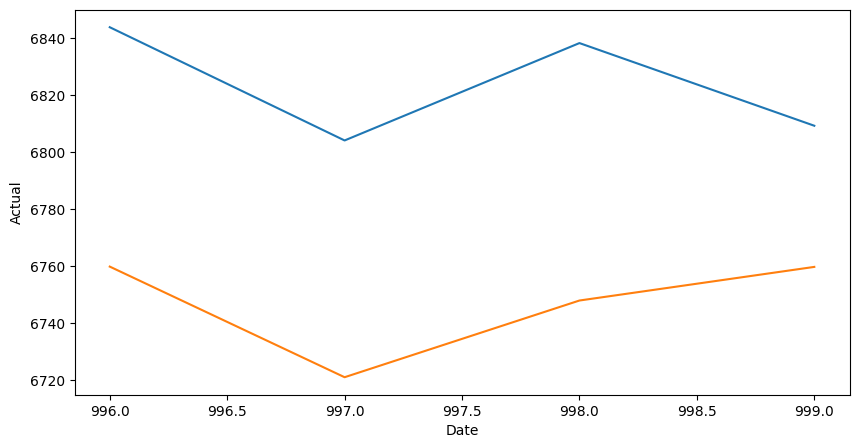

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df__)
sns.lineplot(x="Date", y="Forecast",
             data=df__)

In [ ]:
rmse = mean_squared_error(df__['Forecast'], df__['Actual'], squared=False)
mae = mean_absolute_error(df__['Forecast'], df__['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  78.28
MAE:  76.64


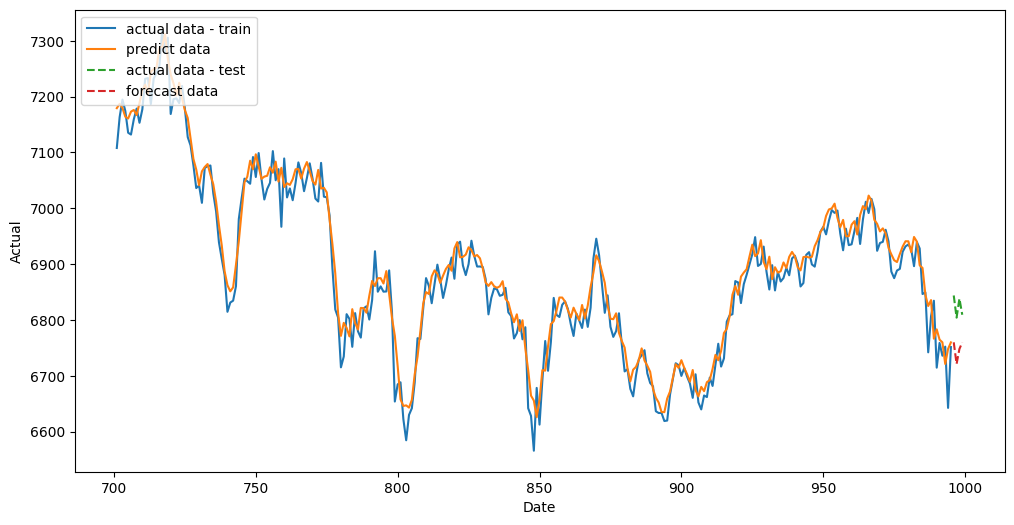

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df__,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df__,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

# Dense-BiLSTM

In [ ]:
modelDenseBiLSTM = tf.keras.Sequential([
        tf.keras.layers.Dense(
            64,
            input_shape=x_train[0].shape,
            activation="relu"),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(n_forecast)
    ])

# Code to val and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)# YOUR CODE HERE
modelDenseBiLSTM.compile(loss=tf.losses.Huber(),
                  optimizer=optimizer,
                  metrics=['mae'])

modelDenseBiLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4, 64)             128       
                                                                 
 bidirectional_1 (Bidirecti  (None, 4, 64)             24832     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 25988 (101.52 KB)
Trainable params: 25988 (101.52 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
modelDenseBiLSTM.compile(loss=tf.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5, patience=5,
                                          verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=1,
                                       restore_best_weights=True)
# mc=tf.keras.callbacks.ModelCheckpoint('./model/UnivariateForecast_DenseBiLSTM-Model.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [ ]:
historyDenseBiLSTM = modelDenseBiLSTM.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=64,
    callbacks=[rlronp, estop],
    validation_data=(x_val,y_val))

Epoch 1/1000
11/11 [==============================] - 6s 187ms/step - loss: 6026.7515 - mae: 6027.2515 - val_loss: 6883.0840 - val_mae: 6883.5840 - lr: 1.0000e-04
Epoch 2/1000
11/11 [==============================] - 0s 12ms/step - loss: 6026.6821 - mae: 6027.1821 - val_loss: 6883.0293 - val_mae: 6883.5293 - lr: 1.0000e-04
Epoch 3/1000
11/11 [==============================] - 0s 13ms/step - loss: 6026.6021 - mae: 6027.1021 - val_loss: 6882.9741 - val_mae: 6883.4741 - lr: 1.0000e-04
Epoch 4/1000
11/11 [==============================] - 0s 13ms/step - loss: 6026.5874 - mae: 6027.0874 - val_loss: 6882.9194 - val_mae: 6883.4194 - lr: 1.0000e-04
Epoch 5/1000
11/11 [==============================] - 0s 11ms/step - loss: 6026.5190 - mae: 6027.0190 - val_loss: 6882.8647 - val_mae: 6883.3647 - lr: 1.0000e-04
Epoch 6/1000
11/11 [==============================] - 0s 12ms/step - loss: 6026.4443 - mae: 6026.9443 - val_loss: 6882.8101 - val_mae: 6883.3101 - lr: 1.0000e-04
Epoch 7/1000
11/11 [=======

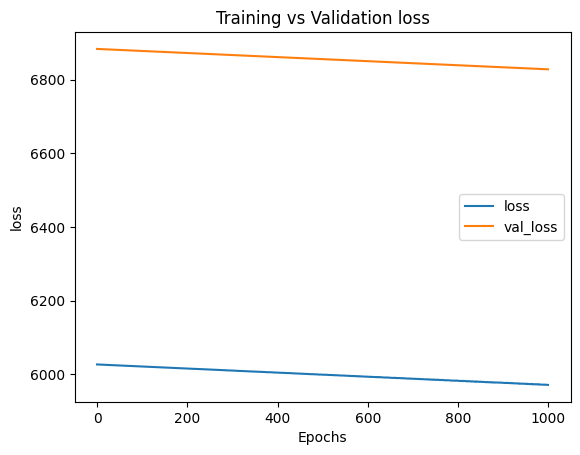

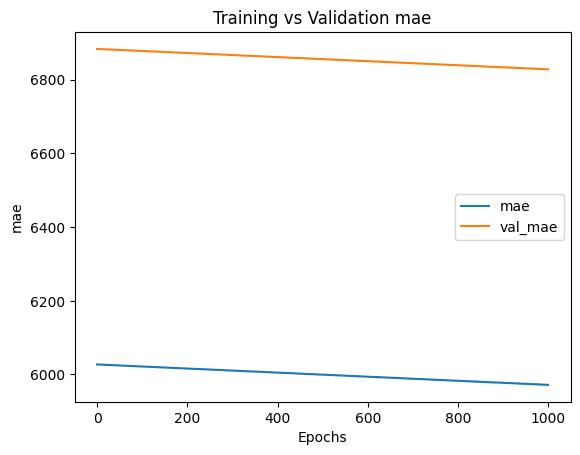

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f"Training vs Validation {metric}")
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(historyDenseBiLSTM, "loss")
plot_graphs(historyDenseBiLSTM, "mae")

## Prediction with validation data

In [ ]:
def model_forecast(model, series, window_size, batch_size):
   ds = tf.data.Dataset.from_tensor_slices(series)
   ds = ds.window(window_size, shift=1, drop_remainder=True)
   ds = ds.flat_map(lambda w: w.batch(window_size))
   ds = ds.batch(batch_size, drop_remainder=True).prefetch(1)
   forecast = model.predict(ds)
   return forecast

In [ ]:
rnn_forecast = model_forecast(modelDenseBiLSTM, Close_val, n_lookback, 1)
print(rnn_forecast.shape)

rnn_forecast = rnn_forecast[:-1, 0]
print(rnn_forecast.shape)
print(Close_val.shape[0]-n_lookback)

296/296 [==============================] - 1s 2ms/step
(296, 4)
(295,)
295


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast[:5]

array([56.19654, 56.19654, 56.19654, 56.19654, 56.19654], dtype=float32)

In [ ]:
actual = np.squeeze(Close_val[-rnn_forecast.shape[0]-2:-2])
print(actual.shape)

(295,)


In [ ]:
# actual = scaler.inverse_transform(actual.reshape(-1, 1))
actual[:5]

array([7107.98291 , 7163.265137, 7194.706055, 7174.208008, 7135.248047])

In [ ]:
df_ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_['Date'] = data_train[-rnn_forecast.shape[0]:].index
df_['Forecast'] = rnn_forecast
df_['Actual'] = actual
df_

,Date,Actual,Forecast
0,701,7107.982910,56.196541
1,702,7163.265137,56.196541
2,703,7194.706055,56.196541
3,704,7174.208008,56.196541
4,705,7135.248047,56.196541
...,...,...,...
290,991,6758.792969,56.196541
291,992,6735.892090,56.196541
292,993,6752.210938,56.196541
293,994,6642.417969,56.196541


<Axes: xlabel='Date', ylabel='Actual'>

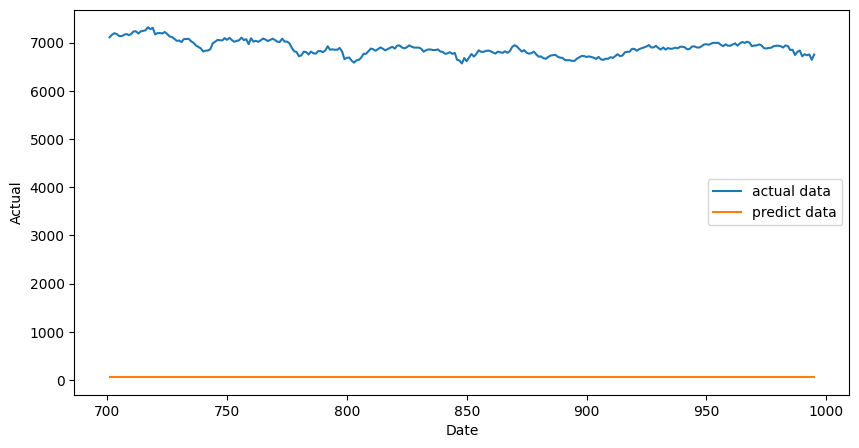

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data")
sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])
mape = mean_absolute_percentage_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))
print('MAPE:', round(mape,2))

Forecast accuracy
RMSE:  6832.76
MAE:  6831.03
MAPE: 121.56


## Prediction with 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = modelDenseBiLSTM.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)


1/1 [==============================] - 1s 799ms/step


In [ ]:
print(np.shape(X_)); print(np.shape(Y_))

(1, 4, 1)
(4, 1)


In [ ]:
actual = np.array(data_test['Close'])
forecast = np.squeeze(Y_)

In [ ]:
print(np.shape(actual)); print(np.shape(forecast))

(4,)
(4,)


In [ ]:
data_test.head()

,Close
996,6843.790039
997,6804.105957
998,6838.232910
999,6809.263184


In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = data_test[-n_forecast:].index
df_future['Forecast'] = forecast
df_future['Actual'] = actual
df_future

,Date,Actual,Forecast
0,996,6843.790039,56.196541
1,997,6804.105957,56.110626
2,998,6838.232910,55.473793
3,999,6809.263184,55.192261


<Axes: xlabel='Date', ylabel='Actual'>

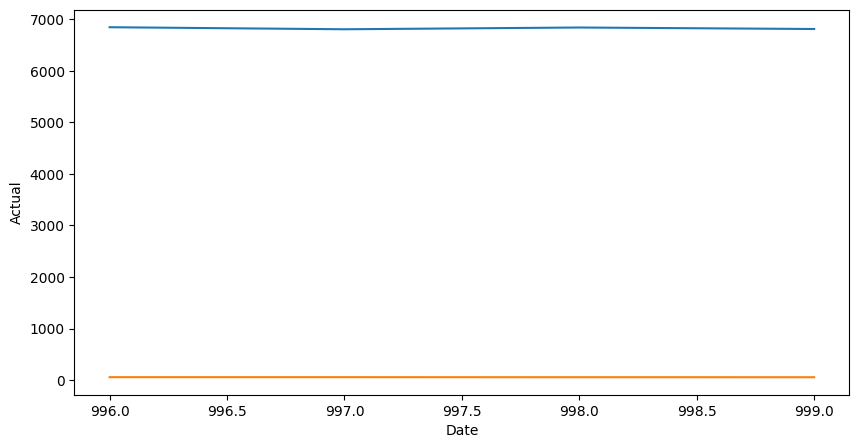

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_future)
sns.lineplot(x="Date", y="Forecast",
             data=df_future)

In [ ]:
rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])
mape = mean_absolute_percentage_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))
print('MAPE:', round(mape,2))

Forecast accuracy
RMSE:  6832.76
MAE:  6831.03
MAPE: 121.56


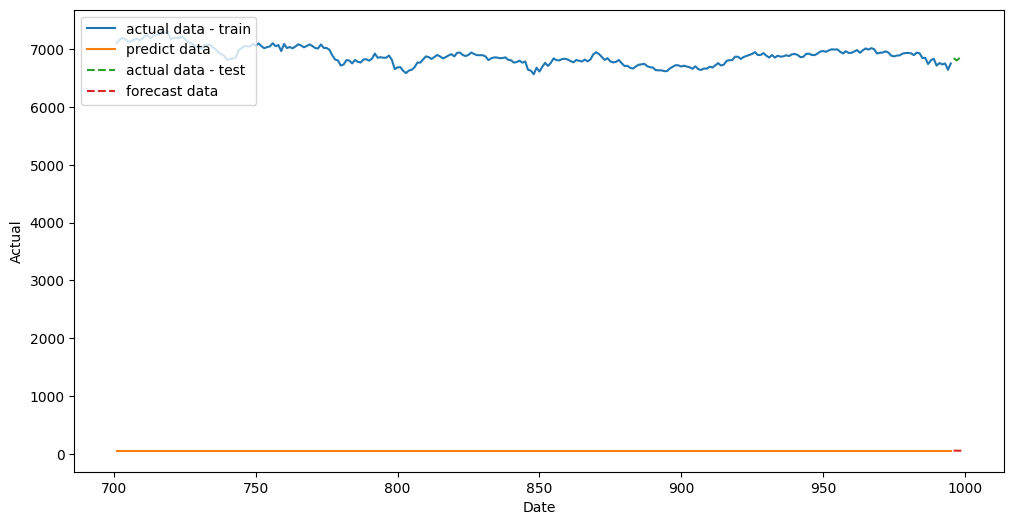

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df_future,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_future,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

## Prediction with 3 x 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback*2:]  # last available input sequence

rnn_forecast2 = model_forecast(modelDenseBiLSTM, X_, n_lookback, 1)
print(rnn_forecast2.shape)

rnn_forecast2 = rnn_forecast2[:-1, 0]
print(rnn_forecast2.shape)
print(Close_val[- n_lookback*2:].shape[0]-n_lookback)

5/5 [==============================] - 0s 5ms/step
(5, 4)
(4,)
4


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast2 = rnn_forecast2[-n_forecast:]
rnn_forecast2.shape

(4,)

In [ ]:
actual = np.array(data_test['Close'])

print(np.shape(actual)); print(np.shape(rnn_forecast2))


(4,)
(4,)


In [ ]:
df__ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df__['Date'] = data_test[-rnn_forecast2.shape[0]:].index
df__['Forecast'] = rnn_forecast2
df__['Actual'] = actual
df__

,Date,Actual,Forecast
0,996,6843.790039,56.196541
1,997,6804.105957,56.196541
2,998,6838.232910,56.196541
3,999,6809.263184,56.196541


<Axes: xlabel='Date', ylabel='Actual'>

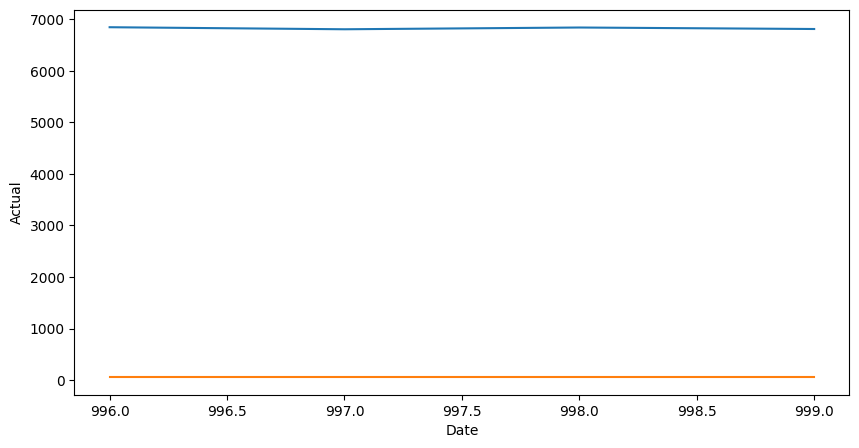

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df__)
sns.lineplot(x="Date", y="Forecast",
             data=df__)

In [ ]:
rmse = mean_squared_error(df__['Forecast'], df__['Actual'], squared=False)
mae = mean_absolute_error(df__['Forecast'], df__['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  6767.67
MAE:  6767.65


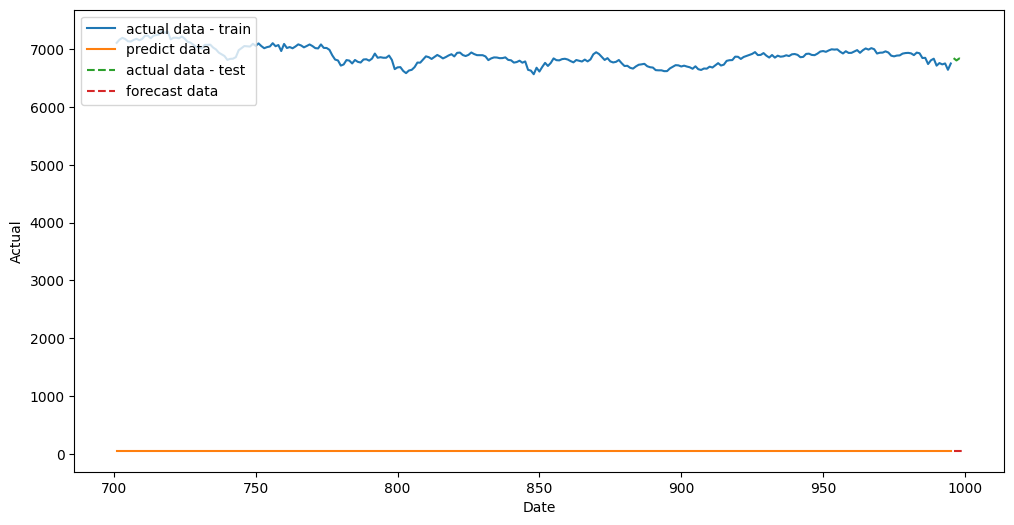

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df__,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df__,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

# 2 Stacked Biderectional LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import Dense

model2StackedBiLSTM = Sequential([
        Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
                                          input_shape=x_train[0].shape),
        Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True)),
        Flatten(),
        Dense(n_forecast)
    ])

model2StackedBiLSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 4, 64)             8704      
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 4, 64)             24832     
 onal)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 34564 (135.02 KB)
Trainable params: 34564 (135.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model2StackedBiLSTM.compile(loss=tf.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5, patience=5,
                                          verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=20,verbose=1,
                                       restore_best_weights=True)
# mc=tf.keras.callbacks.ModelCheckpoint('./model/UnivariateForecast_2StackedBiLSTM-Model.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [ ]:
history2StackedBiLSTM = model2StackedBiLSTM.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=32,
    callbacks=[rlronp, estop],
    validation_data=(x_val,y_val))

Epoch 1/1000
22/22 [==============================] - 8s 66ms/step - loss: 6034.0703 - mae: 6034.5703 - val_loss: 6733.8560 - val_mae: 6734.3560 - lr: 1.0000e-04
Epoch 2/1000
22/22 [==============================] - 1s 29ms/step - loss: 5860.1118 - mae: 5860.6118 - val_loss: 6648.3940 - val_mae: 6648.8940 - lr: 1.0000e-04
Epoch 3/1000
22/22 [==============================] - 1s 34ms/step - loss: 5789.8491 - mae: 5790.3491 - val_loss: 6569.3027 - val_mae: 6569.8027 - lr: 1.0000e-04
Epoch 4/1000
22/22 [==============================] - 0s 21ms/step - loss: 5719.0283 - mae: 5719.5283 - val_loss: 6486.2563 - val_mae: 6486.7563 - lr: 1.0000e-04
Epoch 5/1000
22/22 [==============================] - 0s 11ms/step - loss: 5628.7070 - mae: 5629.2070 - val_loss: 6336.4224 - val_mae: 6336.9224 - lr: 1.0000e-04
Epoch 6/1000
22/22 [==============================] - 0s 12ms/step - loss: 5506.9365 - mae: 5507.4365 - val_loss: 6233.9365 - val_mae: 6234.4365 - lr: 1.0000e-04
Epoch 7/1000
22/22 [========

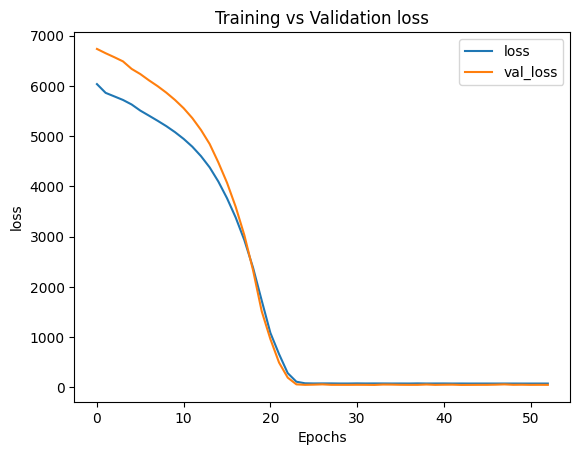

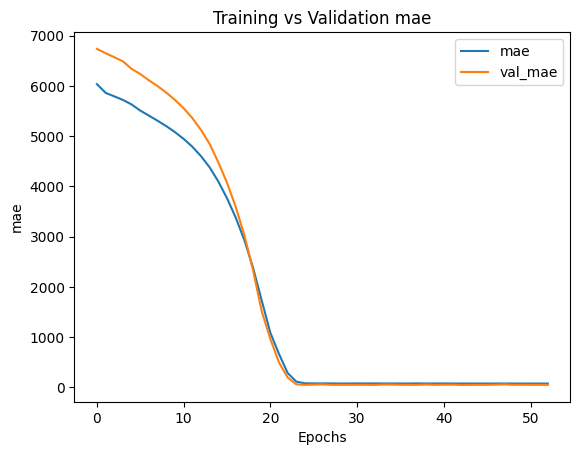

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f"Training vs Validation {metric}")
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history2StackedBiLSTM, "loss")
plot_graphs(history2StackedBiLSTM, "mae")

## Prediction with validation data

In [ ]:
def model_forecast(model, series, window_size, batch_size):
   ds = tf.data.Dataset.from_tensor_slices(series)
   ds = ds.window(window_size, shift=1, drop_remainder=True)
   ds = ds.flat_map(lambda w: w.batch(window_size))
   ds = ds.batch(batch_size, drop_remainder=True).prefetch(1)
   forecast = model.predict(ds)
   return forecast

In [ ]:
rnn_forecast = model_forecast(model2StackedBiLSTM,Close_val, n_lookback, 1)
print(rnn_forecast.shape)

rnn_forecast = rnn_forecast[:-1, 0]
print(rnn_forecast.shape)
print(Close_val.shape[0]-n_lookback)

296/296 [==============================] - 1s 3ms/step
(296, 4)
(295,)
295


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast[:5]

array([7182.9917, 7202.687 , 7188.8086, 7114.2354, 7110.6597],
      dtype=float32)

In [ ]:
actual = np.squeeze(Close_val[-rnn_forecast.shape[0]-2:-2])
print(actual.shape)

(295,)


In [ ]:
# actual = scaler.inverse_transform(actual.reshape(-1, 1))
actual[:5]

array([7107.98291 , 7163.265137, 7194.706055, 7174.208008, 7135.248047])

In [ ]:
df_ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_['Date'] = data_train[-rnn_forecast.shape[0]:].index
df_['Forecast'] = rnn_forecast
df_['Actual'] = actual
df_

,Date,Actual,Forecast
0,701,7107.982910,7182.991699
1,702,7163.265137,7202.687012
2,703,7194.706055,7188.808594
3,704,7174.208008,7114.235352
4,705,7135.248047,7110.659668
...,...,...,...
290,991,6758.792969,6695.478516
291,992,6735.892090,6766.480957
292,993,6752.210938,6545.527344
293,994,6642.417969,6763.595215


<Axes: xlabel='Date', ylabel='Actual'>

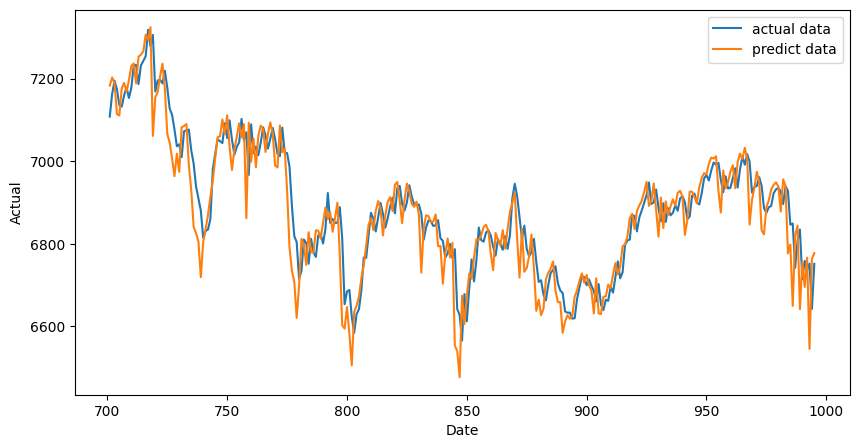

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data")
sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,5))
print('MAE: ', round(mae,5))
print('MAPE: ', round(mape,))

Forecast accuracy
RMSE:  64.83821
MAE:  47.71863
MAPE:  122


## Prediction with 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model2StackedBiLSTM.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)


1/1 [==============================] - 1s 544ms/step


In [ ]:
print(np.shape(X_)); print(np.shape(Y_))

(1, 4, 1)
(4, 1)


In [ ]:
actual = np.array(data_test['Close'])
forecast = np.squeeze(Y_)

In [ ]:
print(np.shape(actual)); print(np.shape(forecast))

(4,)
(4,)


In [ ]:
data_test.head()

,Close
996,6843.790039
997,6804.105957
998,6838.232910
999,6809.263184


In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = data_test[-n_forecast:].index
df_future['Forecast'] = forecast
df_future['Actual'] = actual
df_future

,Date,Actual,Forecast
0,996,6843.790039,6788.688965
1,997,6804.105957,6785.744141
2,998,6838.232910,6802.765625
3,999,6809.263184,6771.549805


<Axes: xlabel='Date', ylabel='Actual'>

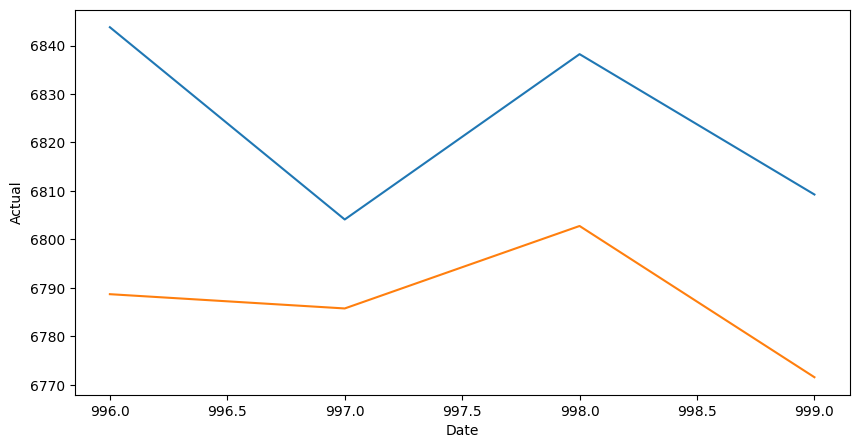

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_future)
sns.lineplot(x="Date", y="Forecast",
             data=df_future)

In [ ]:
rmse = mean_squared_error(df_future['Forecast'], df_future['Actual'], squared=False)
mae = mean_absolute_error(df_future['Forecast'], df_future['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  38.9
MAE:  36.66


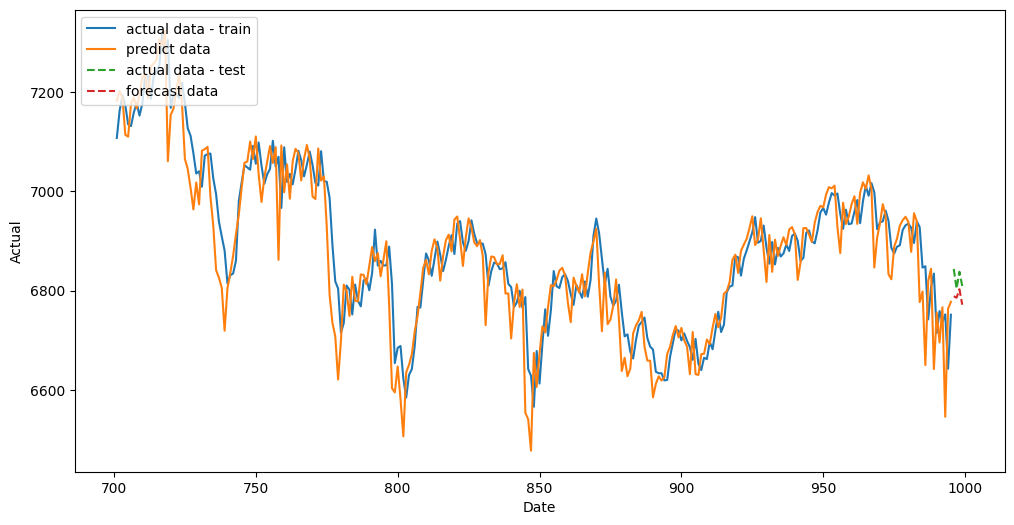

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df_future,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_future,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

## Prediction with 3 x 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback*2:]  # last available input sequence

rnn_forecast2 = model_forecast(model2StackedBiLSTM, X_, n_lookback, 1)
print(rnn_forecast2.shape)

rnn_forecast2 = rnn_forecast2[:-1, 0]
print(rnn_forecast2.shape)
print(Close_val[- n_lookback*2:].shape[0]-n_lookback)

5/5 [==============================] - 0s 6ms/step
(5, 4)
(4,)
4


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast2 = rnn_forecast2[-n_forecast:]
rnn_forecast2.shape

(4,)

In [ ]:
actual = np.array(data_test['Close'])

print(np.shape(actual)); print(np.shape(rnn_forecast2))


(4,)
(4,)


In [ ]:
df__ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df__['Date'] = data_test[-rnn_forecast2.shape[0]:].index
df__['Forecast'] = rnn_forecast2
df__['Actual'] = actual
df__

,Date,Actual,Forecast
0,996,6843.790039,6766.480957
1,997,6804.105957,6545.527344
2,998,6838.232910,6763.595215
3,999,6809.263184,6777.395508


<Axes: xlabel='Date', ylabel='Actual'>

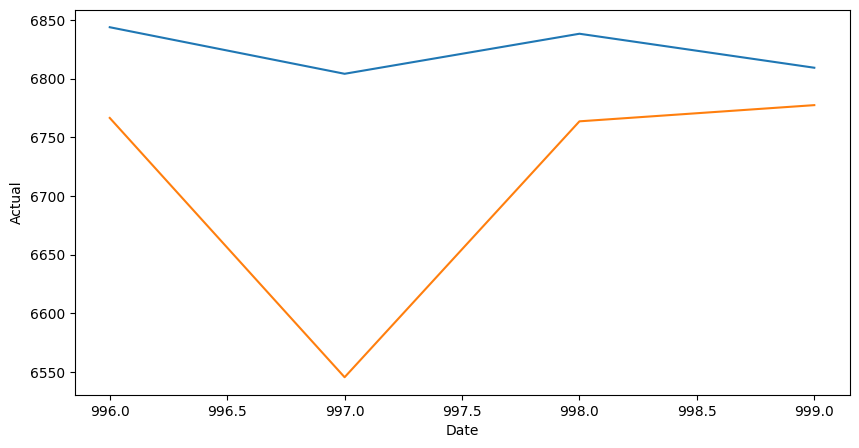

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df__)
sns.lineplot(x="Date", y="Forecast",
             data=df__)

In [ ]:
rmse = mean_squared_error(df__['Forecast'], df__['Actual'], squared=False)
mae = mean_absolute_error(df__['Forecast'], df__['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))
print('MAPE: ', round(mape,9))

Forecast accuracy
RMSE:  140.91
MAE:  110.6
MAPE:  121.556032172


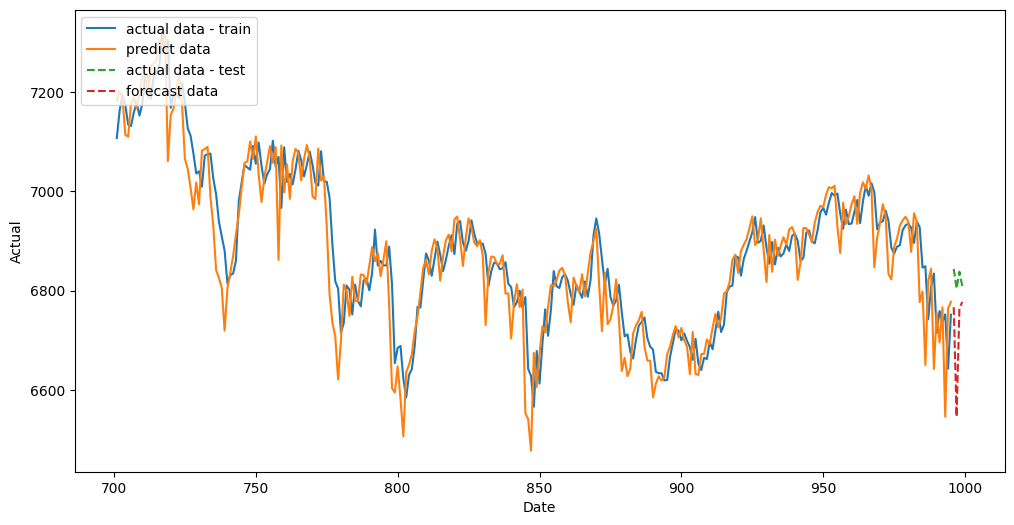

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df__,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df__,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

# 3 Stacked Biderectional LSTM

### Generate 3 Stacked BiLSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import Dense

model3StackedBiLSTM = Sequential([
        Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
                                          input_shape=x_train[0].shape),
        Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True)),
        Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True)),
        Flatten(),
        Dense(n_forecast)
    ])

model3StackedBiLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 4, 64)             8704      
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 4, 64)             24832     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 4, 64)             24832     
 onal)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 1028      
                                                      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model3StackedBiLSTM.compile(loss=tf.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5, patience=5,
                                          verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=20,verbose=1,
                                       restore_best_weights=True)
# mc=tf.keras.callbacks.ModelCheckpoint('./model/UnivariateForecast_3StackedBiLSTM-Model.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [ ]:
history3StackedBiLSTM = model3StackedBiLSTM.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=32,
    callbacks=[rlronp, estop],
    validation_data=(x_val,y_val))

Epoch 1/1000
22/22 [==============================] - 10s 59ms/step - loss: 6047.1133 - mae: 6047.6133 - val_loss: 6905.2993 - val_mae: 6905.7993 - lr: 1.0000e-04
Epoch 2/1000
22/22 [==============================] - 0s 17ms/step - loss: 6039.0308 - mae: 6039.5308 - val_loss: 6890.2285 - val_mae: 6890.7285 - lr: 1.0000e-04
Epoch 3/1000
22/22 [==============================] - 0s 18ms/step - loss: 6030.5312 - mae: 6031.0312 - val_loss: 6883.7129 - val_mae: 6884.2129 - lr: 1.0000e-04
Epoch 4/1000
22/22 [==============================] - 0s 17ms/step - loss: 6019.3569 - mae: 6019.8569 - val_loss: 6864.0806 - val_mae: 6864.5806 - lr: 1.0000e-04
Epoch 5/1000
22/22 [==============================] - 0s 16ms/step - loss: 6004.6797 - mae: 6005.1797 - val_loss: 6849.4507 - val_mae: 6849.9507 - lr: 1.0000e-04
Epoch 6/1000
22/22 [==============================] - 0s 19ms/step - loss: 5990.4077 - mae: 5990.9077 - val_loss: 6831.9116 - val_mae: 6832.4116 - lr: 1.0000e-04
Epoch 7/1000
22/22 [=======

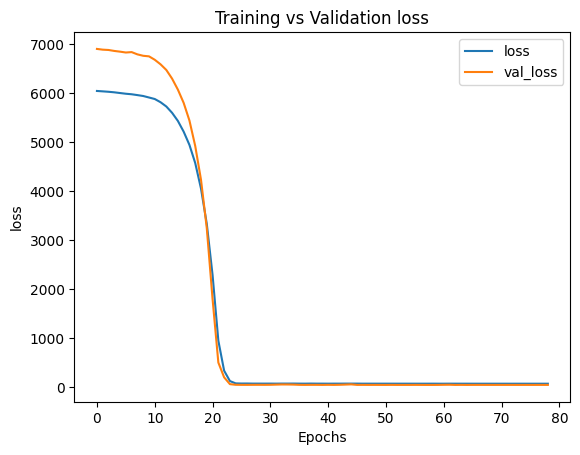

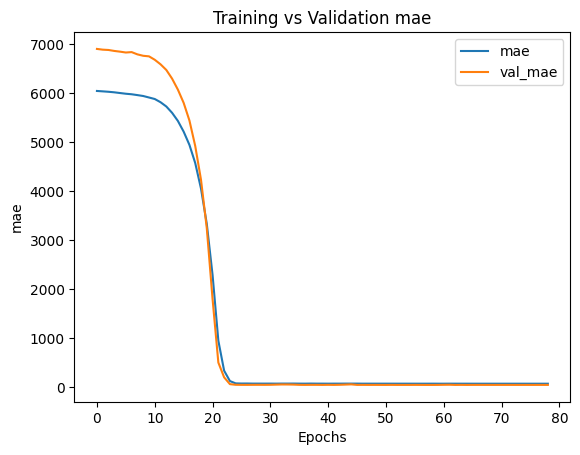

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f"Training vs Validation {metric}")
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history3StackedBiLSTM, "loss")
plot_graphs(history3StackedBiLSTM, "mae")

## Prediction with validation data

In [ ]:
def model_forecast(model, series, window_size, batch_size):
   ds = tf.data.Dataset.from_tensor_slices(series)
   ds = ds.window(window_size, shift=1, drop_remainder=True)
   ds = ds.flat_map(lambda w: w.batch(window_size))
   ds = ds.batch(batch_size, drop_remainder=True).prefetch(1)
   forecast = model.predict(ds)
   return forecast

In [ ]:
rnn_forecast = model_forecast(model3StackedBiLSTM, Close_val, n_lookback, 1)
print(rnn_forecast.shape)

rnn_forecast = rnn_forecast[:-1, 0]
print(rnn_forecast.shape)
print(Close_val.shape[0]-n_lookback)

296/296 [==============================] - 2s 3ms/step
(296, 4)
(295,)
295


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast[:5]

array([7150.419 , 7177.107 , 7171.2065, 7140.661 , 7131.341 ],
      dtype=float32)

In [ ]:
actual = np.squeeze(Close_val[-rnn_forecast.shape[0]-2:-2])
print(actual.shape)

(295,)


In [ ]:
# actual = scaler.inverse_transform(actual.reshape(-1, 1))
actual[:5]

array([7107.98291 , 7163.265137, 7194.706055, 7174.208008, 7135.248047])

In [ ]:
df_ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_['Date'] = data_train[-rnn_forecast.shape[0]:].index
df_['Forecast'] = rnn_forecast
df_['Actual'] = actual
df_

,Date,Actual,Forecast
0,701,7107.982910,7150.418945
1,702,7163.265137,7177.106934
2,703,7194.706055,7171.206543
3,704,7174.208008,7140.661133
4,705,7135.248047,7131.340820
...,...,...,...
290,991,6758.792969,6736.245605
291,992,6735.892090,6747.531250
292,993,6752.210938,6666.669434
293,994,6642.417969,6732.622070


<Axes: xlabel='Date', ylabel='Actual'>

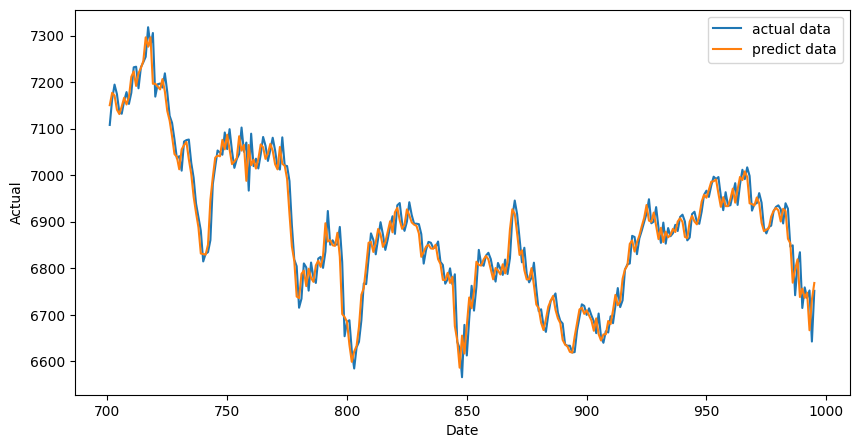

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data")
sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse = mean_squared_error(df_['Forecast'], df_['Actual'], squared=False)
mae = mean_absolute_error(df_['Forecast'], df_['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))
print('MAPE: ', round(mape,9))

Forecast accuracy
RMSE:  33.22
MAE:  25.68
MAPE:  121.556032172


## Prediction with 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model3StackedBiLSTM.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)


1/1 [==============================] - 1s 819ms/step


In [ ]:
print(np.shape(X_)); print(np.shape(Y_))

(1, 4, 1)
(4, 1)


In [ ]:
actual = np.array(data_test['Close'])
forecast = np.squeeze(Y_)

In [ ]:
print(np.shape(actual)); print(np.shape(forecast))

(4,)
(4,)


In [ ]:
data_test.head()

,Close
996,6843.790039
997,6804.105957
998,6838.232910
999,6809.263184


In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = data_test[-n_forecast:].index
df_future['Forecast'] = forecast
df_future['Actual'] = actual
df_future

,Date,Actual,Forecast
0,996,6843.790039,6851.681641
1,997,6804.105957,6861.107910
2,998,6838.232910,6869.209961
3,999,6809.263184,6863.144531


<Axes: xlabel='Date', ylabel='Actual'>

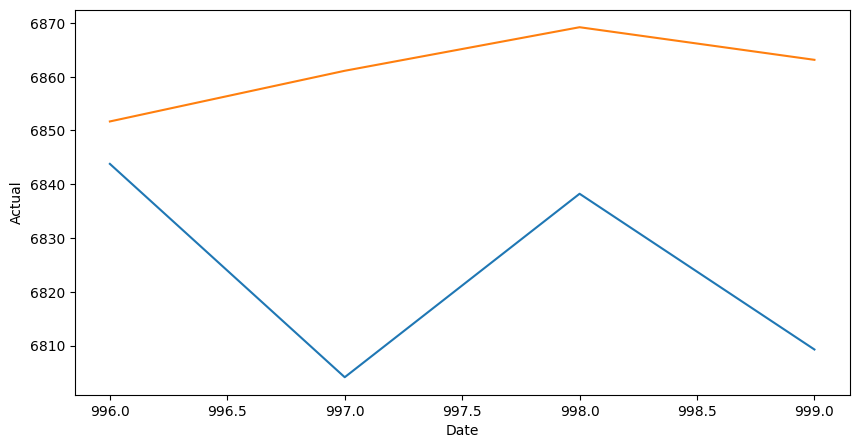

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df_future)
sns.lineplot(x="Date", y="Forecast",
             data=df_future)

In [ ]:
rmse = mean_squared_error(df_future['Forecast'], df_future['Actual'], squared=False)
mae = mean_absolute_error(df_future['Forecast'], df_future['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  42.35
MAE:  37.44


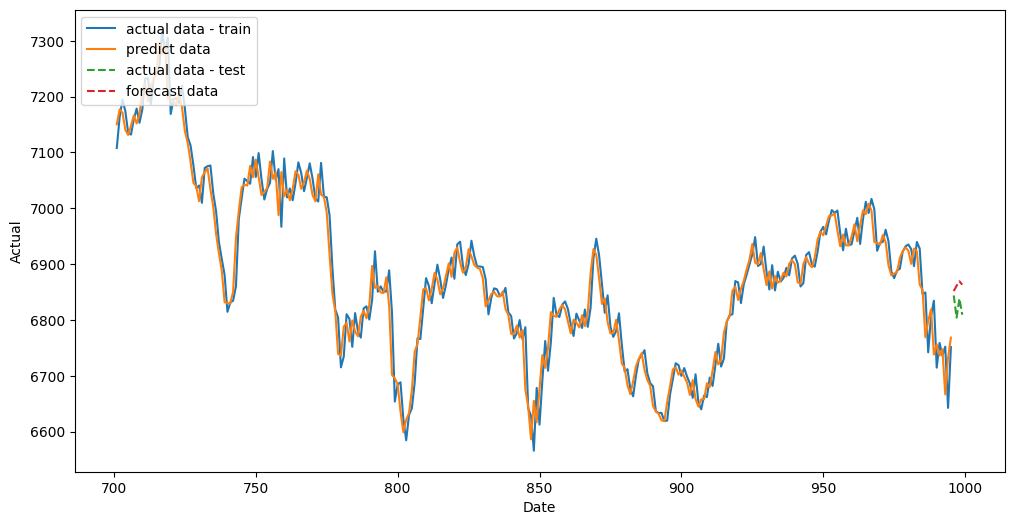

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df_future,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_future,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')

## Prediction with 3 x 4 months data observation

In [ ]:
# generate the forecasts
X_ = Close_val[- n_lookback*2:]  # last available input sequence

rnn_forecast2 = model_forecast(model3StackedBiLSTM, X_, n_lookback, 1)
print(rnn_forecast2.shape)

rnn_forecast2 = rnn_forecast2[:-1, 0]
print(rnn_forecast2.shape)
print(Close_val[- n_lookback*2:].shape[0]-n_lookback)

5/5 [==============================] - 0s 7ms/step
(5, 4)
(4,)
4


In [ ]:
# rnn_forecast2 = scaler.inverse_transform(rnn_forecast2.reshape(-1, 1))
rnn_forecast2 = rnn_forecast2[-n_forecast:]
rnn_forecast2.shape

(4,)

In [ ]:
actual = np.array(data_test['Close'])

print(np.shape(actual)); print(np.shape(rnn_forecast2))


(4,)
(4,)


In [ ]:
df__ = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df__['Date'] = data_test[-rnn_forecast2.shape[0]:].index
df__['Forecast'] = rnn_forecast2
df__['Actual'] = actual
df__

,Date,Actual,Forecast
0,996,6843.790039,6747.531250
1,997,6804.105957,6666.669434
2,998,6838.232910,6732.622070
3,999,6809.263184,6768.268066


<Axes: xlabel='Date', ylabel='Actual'>

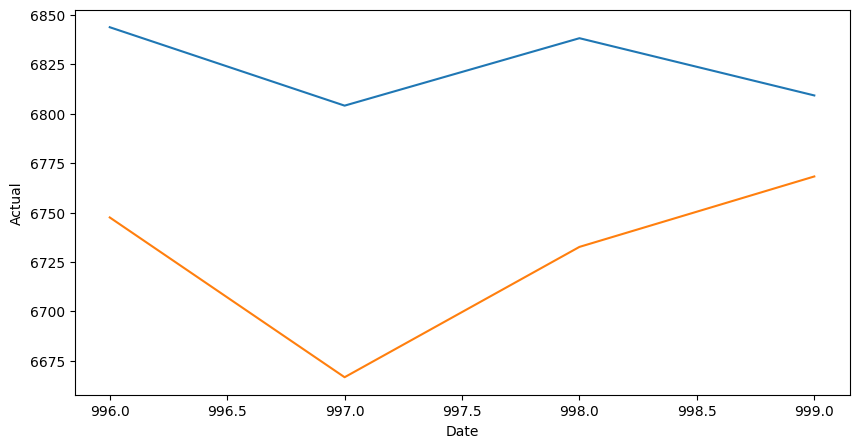

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date", y="Actual",
             data=df__)
sns.lineplot(x="Date", y="Forecast",
             data=df__)

In [ ]:
rmse = mean_squared_error(df__['Forecast'], df__['Actual'], squared=False)
mae = mean_absolute_error(df__['Forecast'], df__['Actual'])

print('Forecast accuracy')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy
RMSE:  101.23
MAE:  95.08


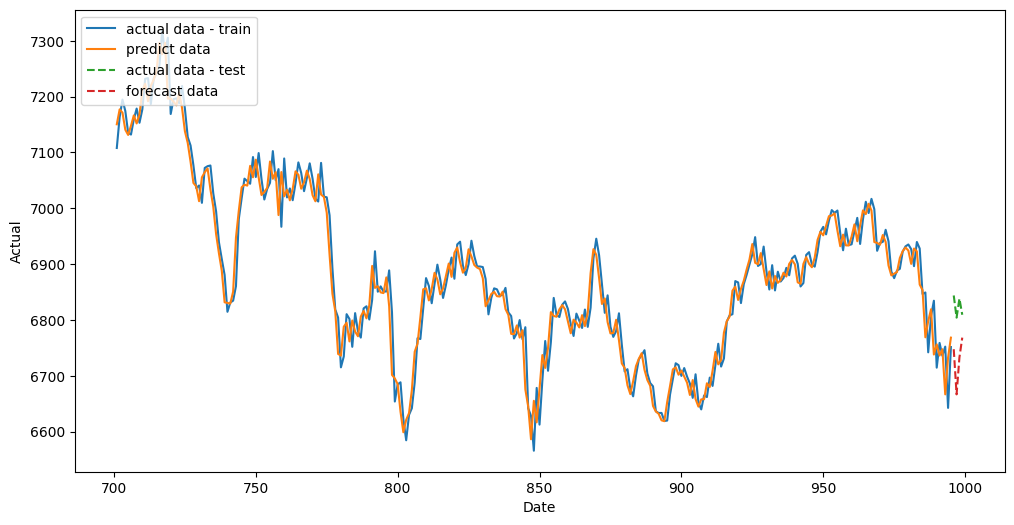

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.lineplot(x="Date", y="Actual",
             data=df_, label="actual data - train")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df_, label="predict data")
ax = sns.lineplot(x="Date", y="Actual",
             data=df__,
             label="actual data - test", linestyle="--")
ax = sns.lineplot(x="Date", y="Forecast",
             data=df__,
             label="forecast data", linestyle="--")
plt.legend(loc='upper left')